In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/winequalityN.csv')

In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# data of top 5 rows
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# data of bottom 5 rows
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# statistical information
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


**Preprocessing The Dataset**

In [ ]:
# checking for the null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# filling of the missing values
for col, value in df.items():
    if col != 'type': #ignoring the 'type' column because the value is in string
        df[col] = df[col].fillna(df[col].mean())

#df[col] = df[col].fillna(df[col].mean()):

#df[col] refers to the current column being processed.
#fillna(df[col].mean()) fills the missing values in that column (df[col]) with the mean of the non-missing values in that same column.
#df[col].mean() calculates the mean (average) of the non-missing values in the current column.

In [ ]:
# running again to check if null values are removed or not
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.max()

type                      white
fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
dtype: object

In [ ]:
df.shape

(6497, 13)

In [ ]:
wine_red = df[df["type"] == "red"].copy()
wine_white = df[df["type"] == "white"].copy()
red_wine_stats = pd.DataFrame({"Red Wine Stats" : wine_red.describe().loc["mean"]})

In [ ]:
red_wine_stats.head()

,Red Wine Stats
fixed acidity,8.320721
volatile acidity,0.527620
citric acid,0.271175
residual sugar,2.538806
chlorides,0.087467


In [ ]:
white_wine_stats = pd.DataFrame({"White Wine Stats" : wine_white.describe().loc["mean"]})

In [ ]:
red_wine_stats = red_wine_stats.merge(white_wine_stats, on = red_wine_stats.index)
red_wine_stats

,key_0,Red Wine Stats,White Wine Stats
0,fixed acidity,8.320721,6.856121
1,volatile acidity,0.527620,0.278340
2,citric acid,0.271175,0.334244
3,residual sugar,2.538806,6.392862
4,chlorides,0.087467,0.045783
5,free sulfur dioxide,15.874922,35.308085
6,total sulfur dioxide,46.467792,138.360657
7,density,0.996747,0.994027
8,pH,3.310748,3.188246
9,sulphates,0.657919,0.489851


**Visualization of Data, And Analyzing it**

<Axes: xlabel='type', ylabel='count'>

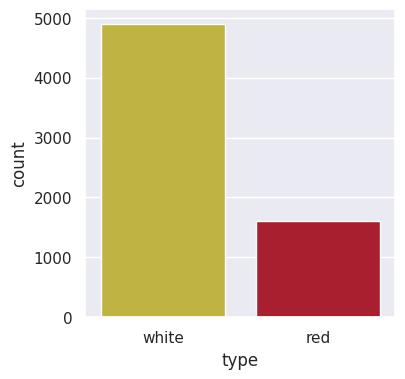

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})

sns.countplot(data = df, x = 'type', palette={'red': '#bf081d', 'white': '#d4c52d'})

We can see that wine type 'white' is not balanced with 'red'. This might not represent an issue in our analysis and modeling but it will be worth to compare if having a more equally distributed sampling will generate a different result in our classifiers. The data for red wine is only 25% of the complete dataset hence we needed to take that into consideration.

**Wine Quality Bins**

We shall categorize the wine quality into Low = (3, 4), Medium = (5,6) and High = (7,8,9) so that it enables us to see more clearly how different features vary across the different qualities.

In [ ]:
def wine_quality(x):

  if x < 5 :
    label = 'Low'
  elif x > 4 and x < 7:
    label = 'Medium'
  else:
    label = "High"

  return label

We shall define the data colors to match the wine color

In [ ]:
colours = ["#d4c52d","#bf081d"]
sns.set_palette(sns.color_palette(colours))

Let us look into how the data is distributed for each feature for red and white wine and we can print the skewness as well.

Feature fixed acidity has skewness 1.7237332100228064
Feature volatile acidity has skewness 1.4960872382618045
Feature citric acid has skewness 0.47303238175058926
Feature residual sugar has skewness 1.434889280399139
Feature chlorides has skewness 5.399432733792378
Feature free sulfur dioxide has skewness 1.219784372282318
Feature total sulfur dioxide has skewness -0.001177206365785478
Feature density has skewness 0.5034854532378842
Feature pH has skewness 0.38714470176958515
Feature sulphates has skewness 1.7986052869527671
Feature alcohol has skewness 0.5655871101918292
Feature quality has skewness 0.18957891127582205


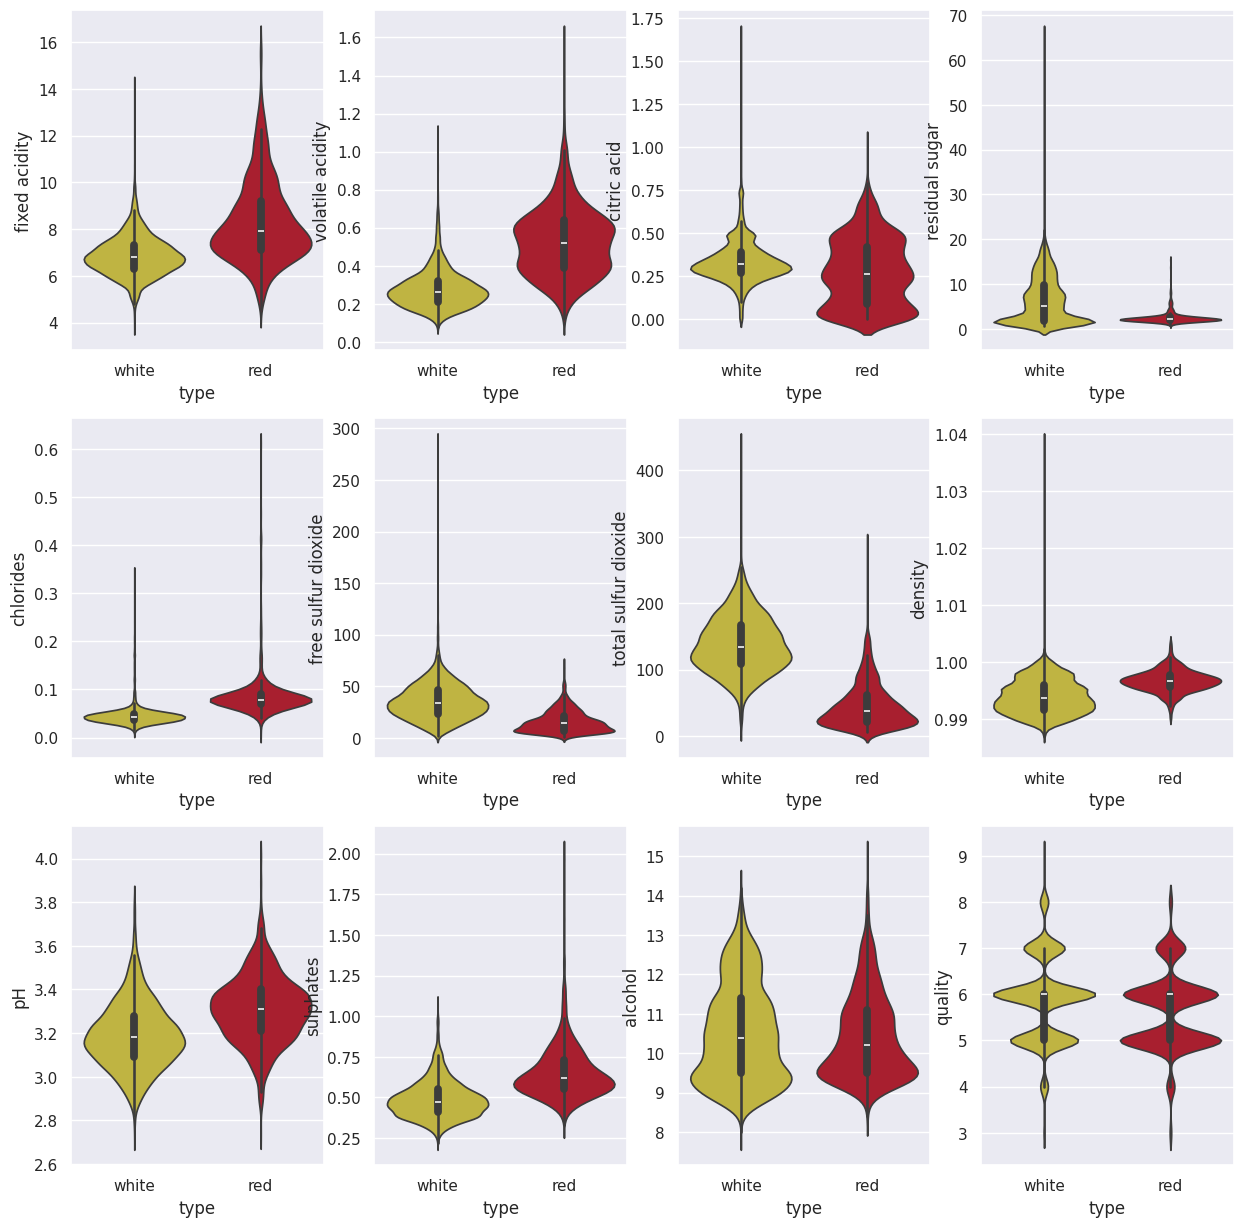

In [ ]:
from scipy.stats import skew
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# for feature in numerical:
#   sns.boxplot(data = wine_df, y = feature)
fig, axes = plt.subplots(3, 4, figsize=(15,15))
# for i , row in enumerate(axes):
#   i, j = divmod(0, 3)
#   sns.boxplot(data = wine_df, y = features[i], x = 'type', ax = axes[i, j])

for i, ax in enumerate(axes.flat):
    sns.violinplot(data = df, y = features[i], x = 'type', ax = ax, palette={'red': '#bf081d', 'white': '#d4c52d'})

    sk = skew(df[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

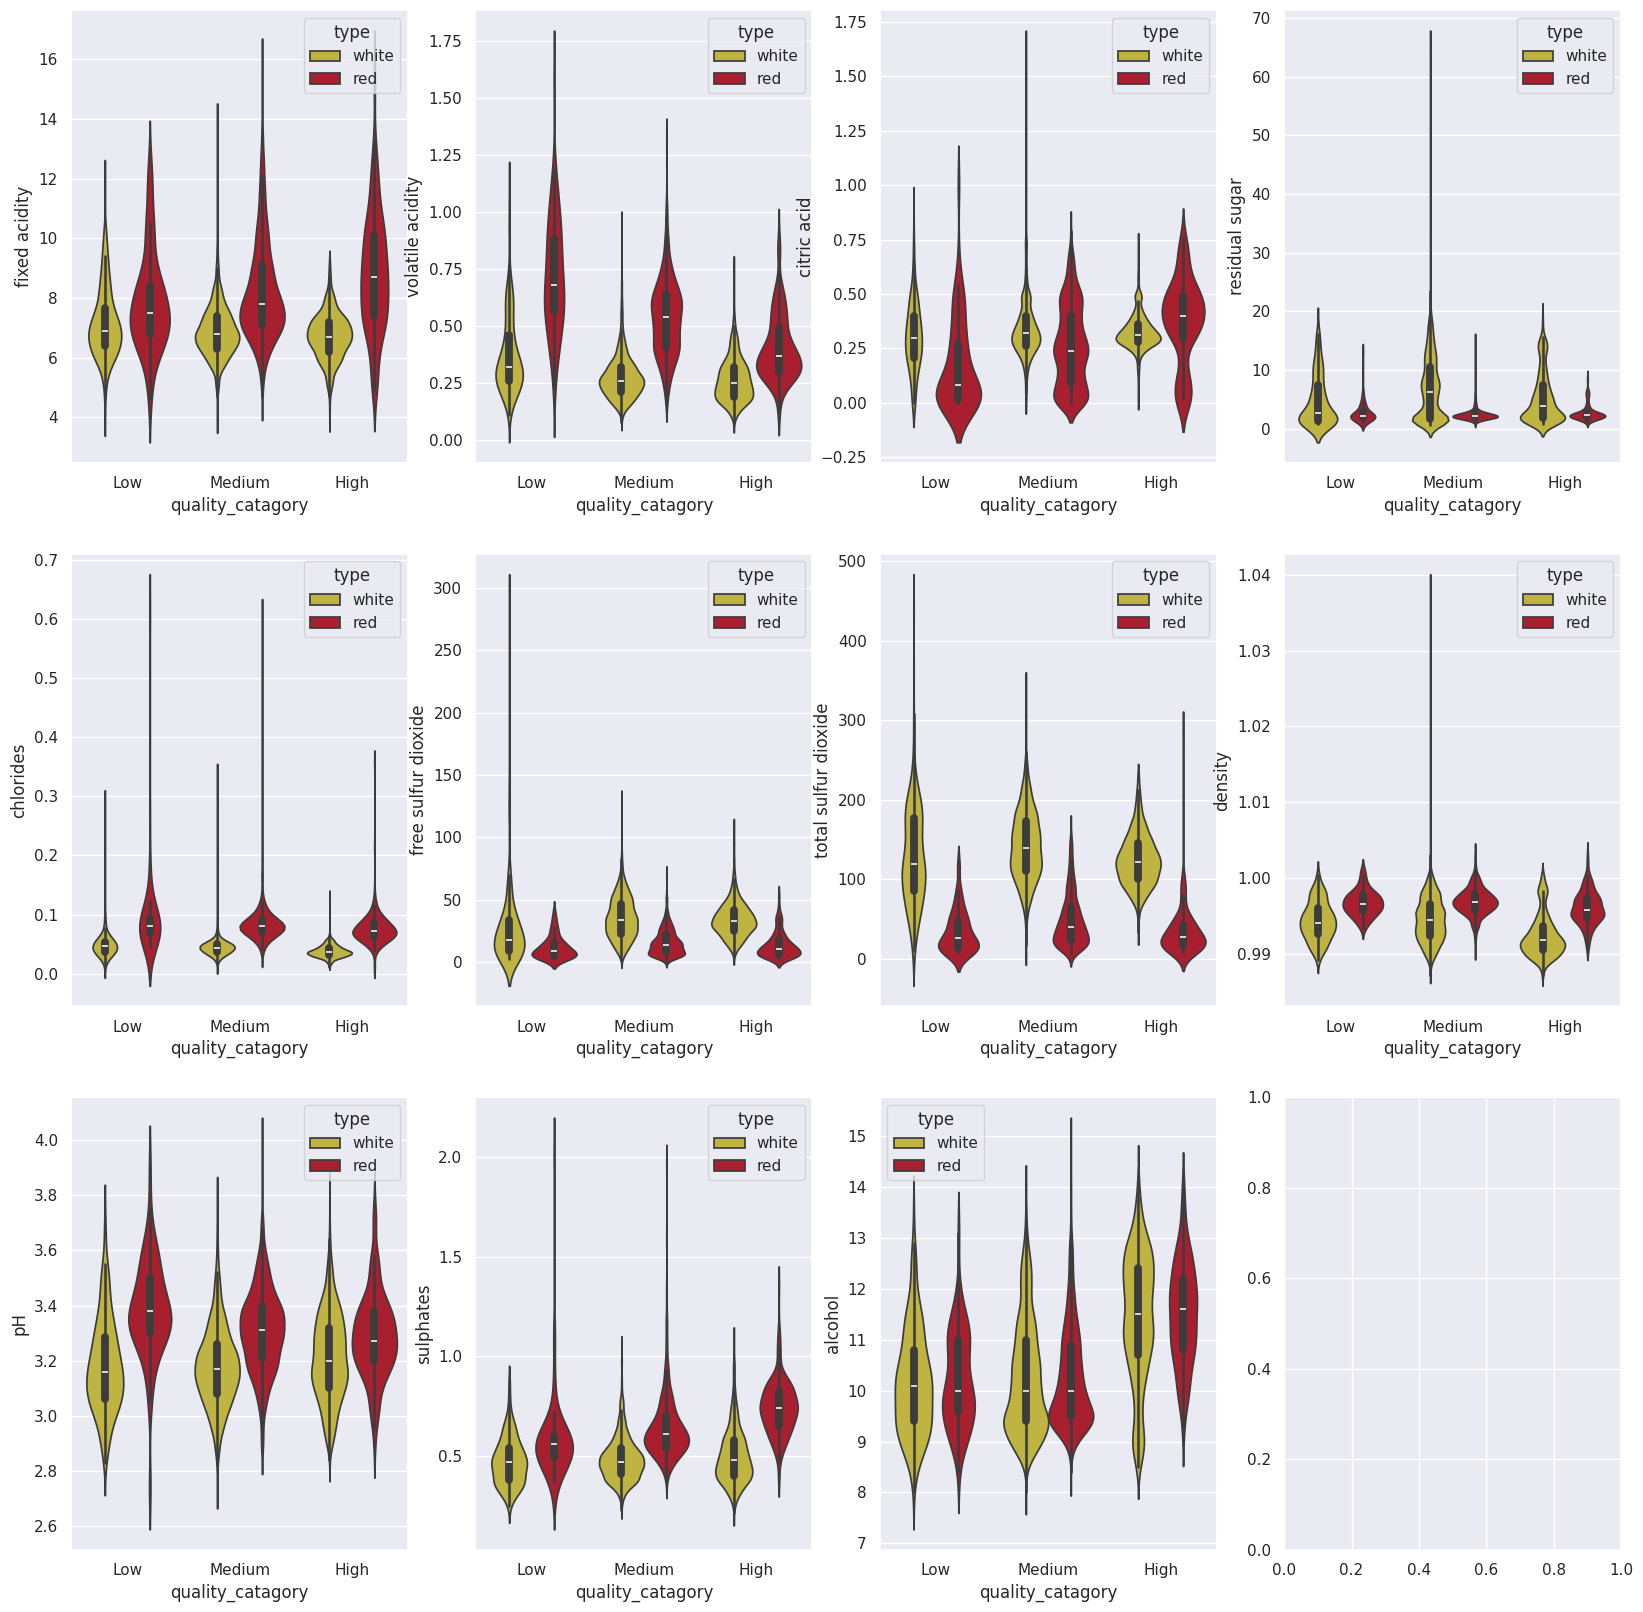

In [ ]:
wine_df_viz = df.copy()
wine_df_viz["quality_catagory"] = df["quality"].apply(wine_quality)
features_violin = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
fig_2, axes_2 = plt.subplots(3, 4, figsize=(20,20))
x_order= ["Low", "Medium", "High"]
for i, ax in enumerate(axes_2.flat):
    if i == len(features_violin):
        break
    sns.violinplot(data = wine_df_viz, y = features_violin[i], x = 'quality_catagory',hue = 'type', ax = ax, order =x_order, palette={'red': '#bf081d', 'white': '#d4c52d'})

Volatile acidity is a very strong indicator for red wine, it is very evident once we check against the wine quality numbers. However the same cannot be said about white wine

<Axes: xlabel='quality', ylabel='volatile acidity'>

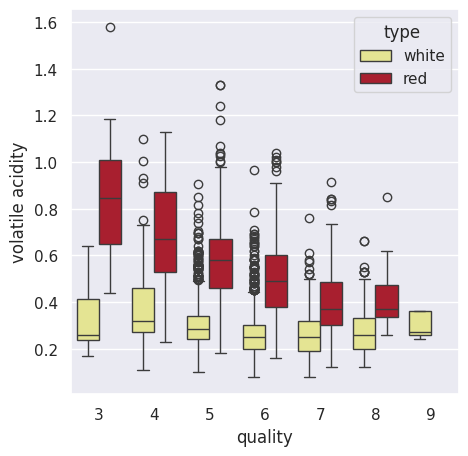

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
colours = ["#f1f285","#bf081d"]
sns.set_palette(sns.color_palette(colours))
sns.boxplot(data = df, x = "quality", y = "volatile acidity" , hue = "type", ax = ax)

**Alcohol and Wine Quality**

Acidity clearly seems to play an important role in the wine quality for both types of wine. It is interesting to note that for wine quality 5 the variation in alcohol content is massive

<Axes: xlabel='quality', ylabel='alcohol'>

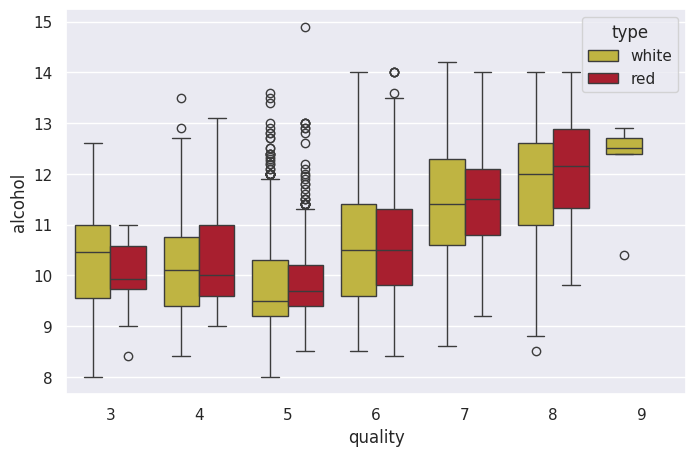

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
colours = ["#d4c52d","#bf081d"]
sns.set_palette(sns.color_palette(colours))
sns.boxplot(data = df, x = "quality", y = "alcohol" , hue = "type", ax = ax)

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import skew
wine_df_viz = df.copy()
wine_df_viz = wine_df_viz[(np.abs(stats.zscore(wine_df_viz["density"])) < 3)]

It has been observed that red wine tends to have a higher density than white wine with the same alcohol content. However, it is important to note that both types of wine exhibit a negative correlation between density and alcohol content, which is consistent with the fermentation process. As a result, the density-alcohol relationship is an essential aspect of wine production that contributes to its unique flavor and quality.

We can see below that the correlation with density and alcohol is same for both types of wine, the major difference is that red wine has higher density compared to white wine.

<Axes: xlabel='alcohol', ylabel='density'>

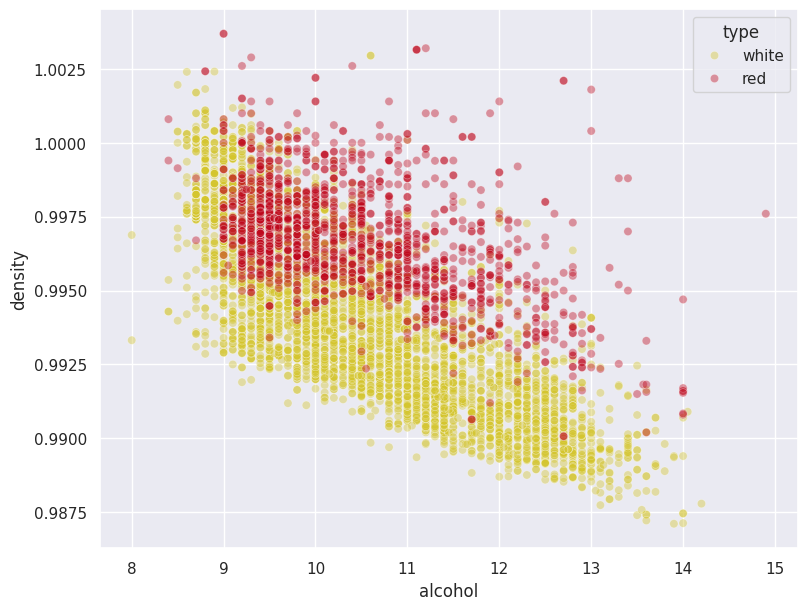

In [ ]:
plt.figure(figsize=(9, 7))
sns.scatterplot(data = wine_df_viz, x = "alcohol", y = "density", hue = "type", alpha=0.4)

**Wine Quality Bubble Chart**

Now that we are aware of the important features for wine quality we can bring them together to get a more overall idea

<Axes: xlabel='volatile acidity', ylabel='alcohol'>

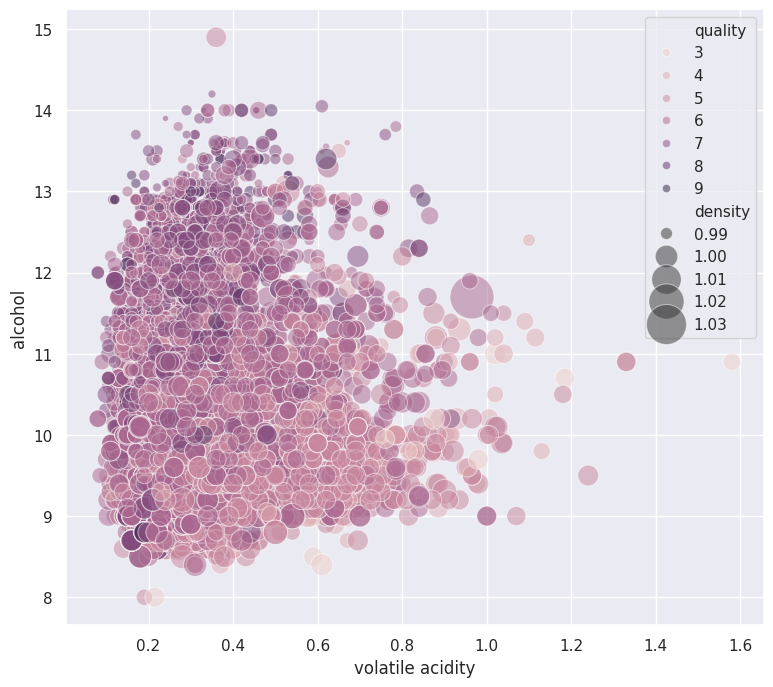

In [ ]:
fig, ax = plt.subplots(figsize=(9,8))
#sizes=(20, 1000),
sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data = df, x = "volatile acidity", y = "alcohol", hue = "quality", alpha=0.5, size = 'density' , sizes = (20, 1000))

**White Wine Bubble Chart**

Now that we have probed into the important features separately, let us see how they come together. Below you can see for higher quality wine the bubbles are light colored and big, meaning they have low sulfur dioxide and high alcohol, whereas the lower quality ones have darker and smaller bubbles indicating higher sulfur dioxide and less alcohol.

<Axes: xlabel='volatile acidity', ylabel='quality'>

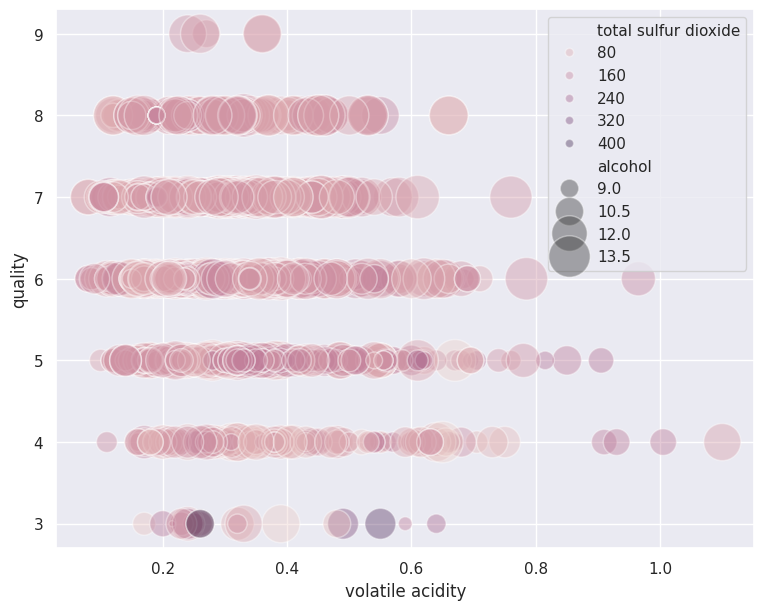

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
#sizes=(20, 1000),
sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data = df[df["type"] == 'white'], x = "volatile acidity", y = "quality", hue = "total sulfur dioxide", alpha=0.4, size = 'alcohol' , sizes = (20, 1000))

Clearly the higher wine quality has lower acidity and less sulfur dioxode and much higher alcohol.



All the low quality wines have high sulfur dioxide, they also have small bubles which is low alcohol content.
Interestingly enough the wine quality is spread out across different volatile acidity content.

**Red Wine Bubble Chart**

For red wine the volatile acidity has a stronger impact on the quality. However higher sulfur dioxide does not necessarily mean lower quality wine although the correlation matrix shows otherwise. The percentage of alcohol is high for better wine across both red and white wine.

<Axes: xlabel='volatile acidity', ylabel='quality'>

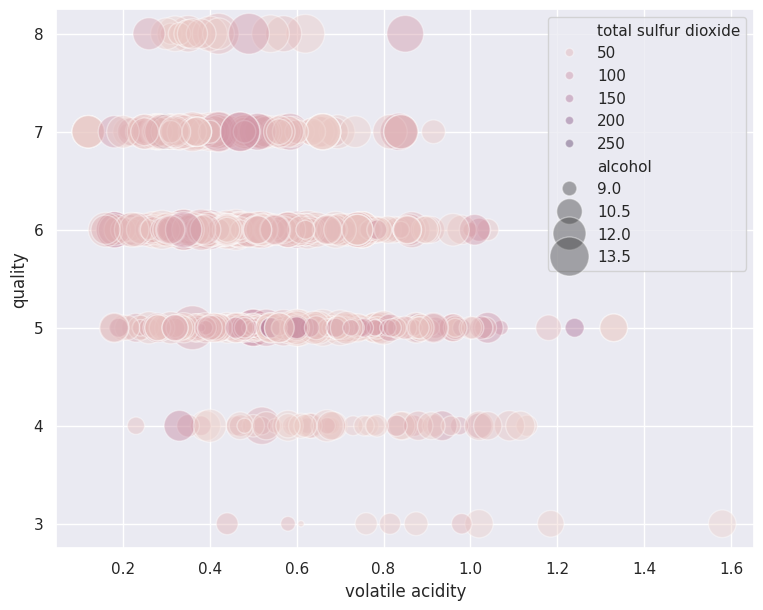

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
#sizes=(20, 1000),
sns.color_palette("Blues", as_cmap=True)

sns.scatterplot(data =df[df["type"] == 'red'], x = "volatile acidity", y = "quality", hue = "total sulfur dioxide", alpha=0.4, size = 'alcohol' , sizes = (20, 1000))

The higher wine quality has much lower sulfur dioxide as we can see from the lighter colors. The bigger circles Indicating much higher alcohol content with most of them clustered towards the left i.e. less acidity.

Interestingly all lower quality red wines also have low amounts of sulfur dioxide which was not the case for white wine. For red wine alcohol is clearly a strong indicator of quality, we only see very small bubbles in low quality wine. Overall in red wine we can notice a pattern of higher acidity associated with lower wine quality.

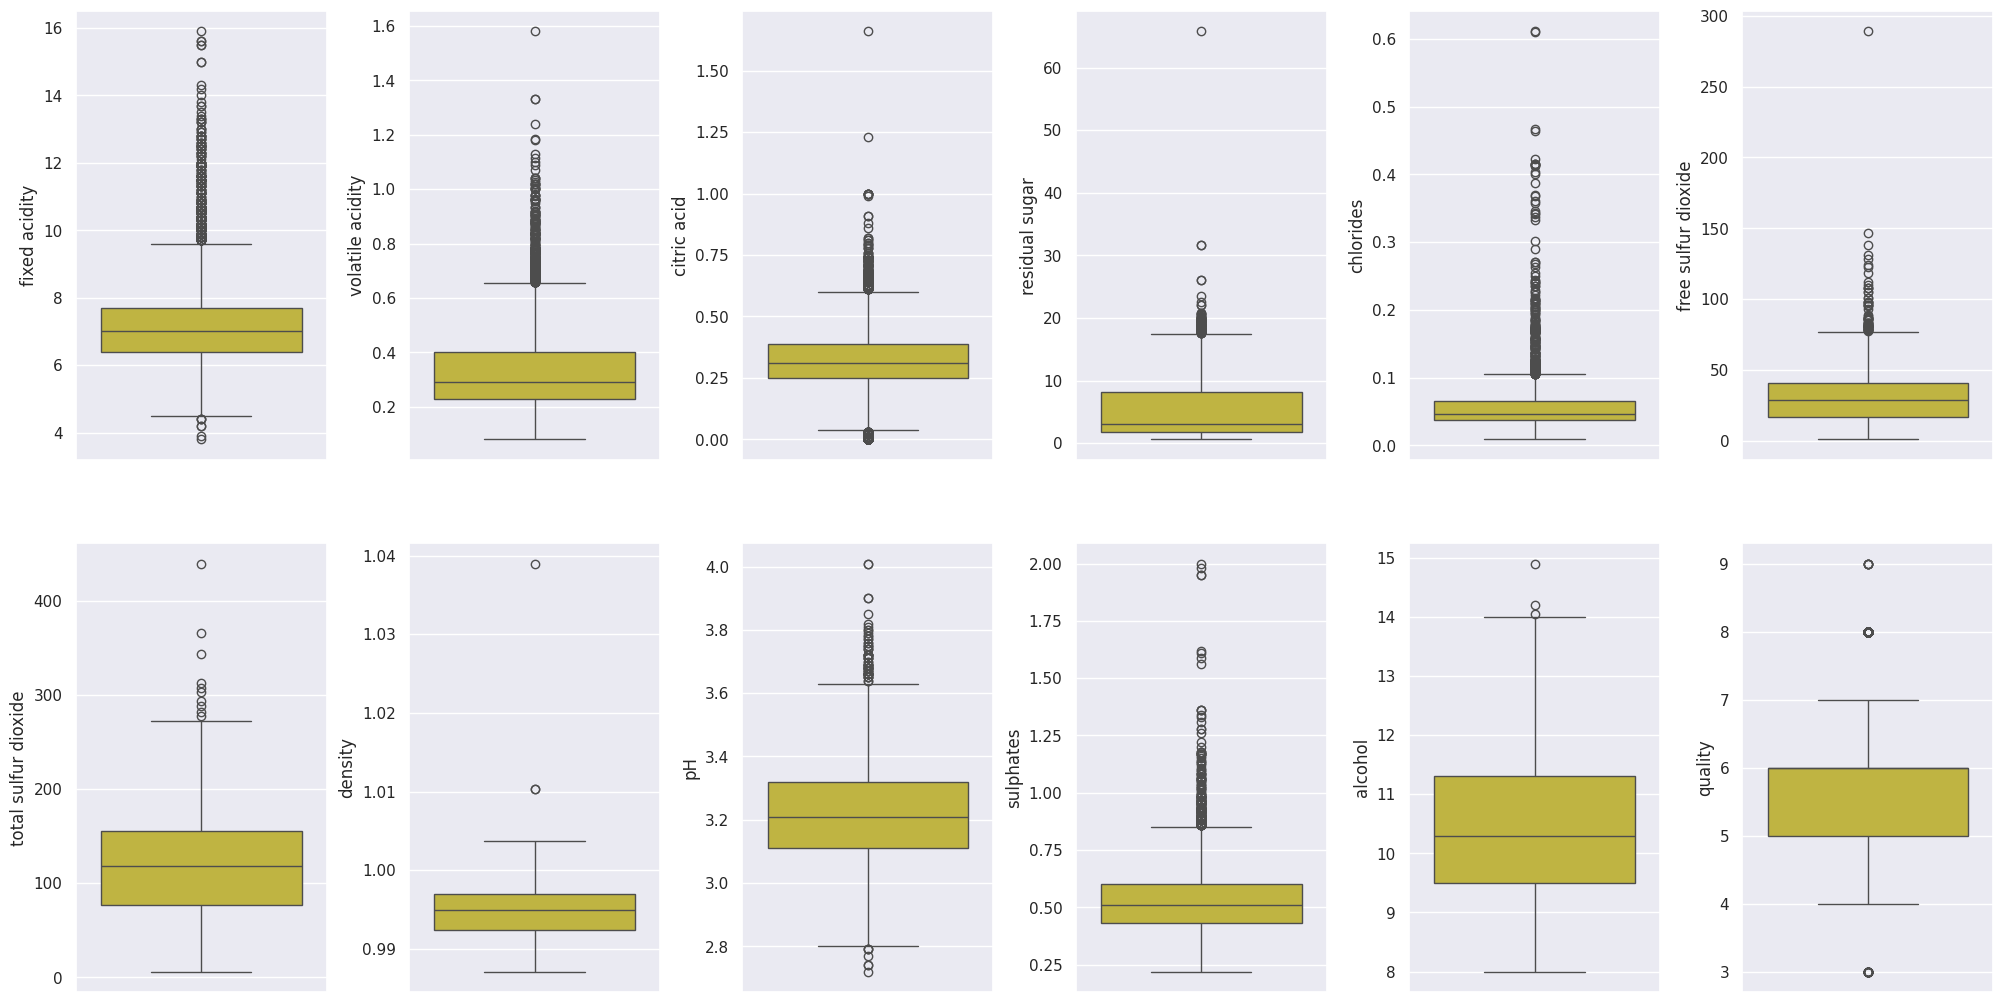

In [ ]:
# creating plots in shape of different boxes
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
# to make the graphs look good, we will add this line in code
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

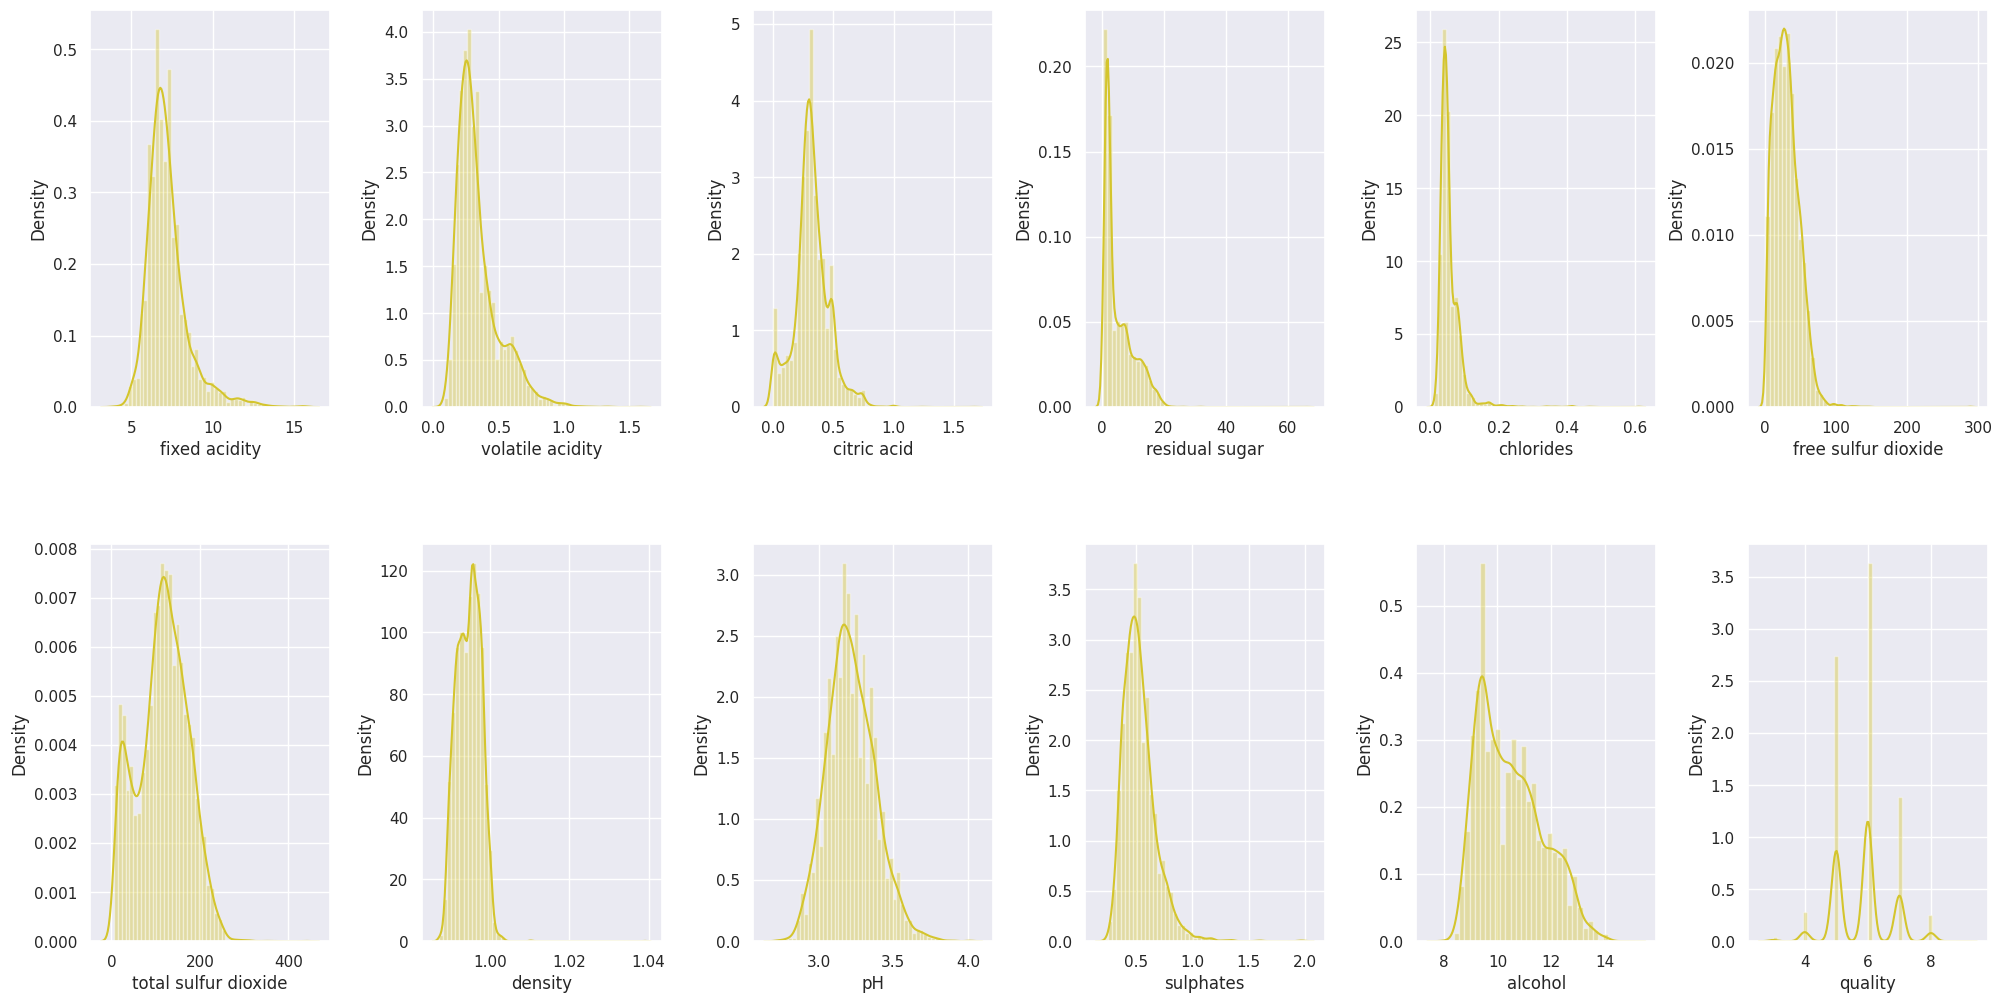

In [ ]:
# creating distribution plots in shape of different graphs
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
# to make the graphs look good, we will add this line in code
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='quality', ylabel='count'>

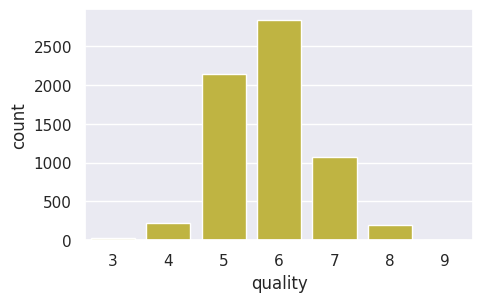

In [ ]:
#ploting countplot quality
plt.figure(figsize=(5,3))
sns.countplot(x='quality',data=df)

In [ ]:
#converting categorical to numerical
df['type']=pd.get_dummies(df['type'],drop_first=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Train model**

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality',axis=1))

StandardScaler()

In [ ]:
# start with modelling
# split data into train and test
from sklearn.model_selection import train_test_split
X=df.drop('quality',axis=1)
y=df['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

Random Forest Accuracy: 67.59%
Linear Regression Accuracy: 30.15%
SVM Accuracy: 59.28%
KNN Accuracy: 54.62%
Decision Tree Accuracy: 58.05%
Naive Bayes Accuracy: 33.90%
               Model     Score   Color
3      Random Forest  0.675897     red
2                SVM  0.592821   green
5      Decision Tree  0.580513   brown
1                KNN  0.546154  orange
4        Naive Bayes  0.338974  purple
0  Linear Regression  0.301529    blue


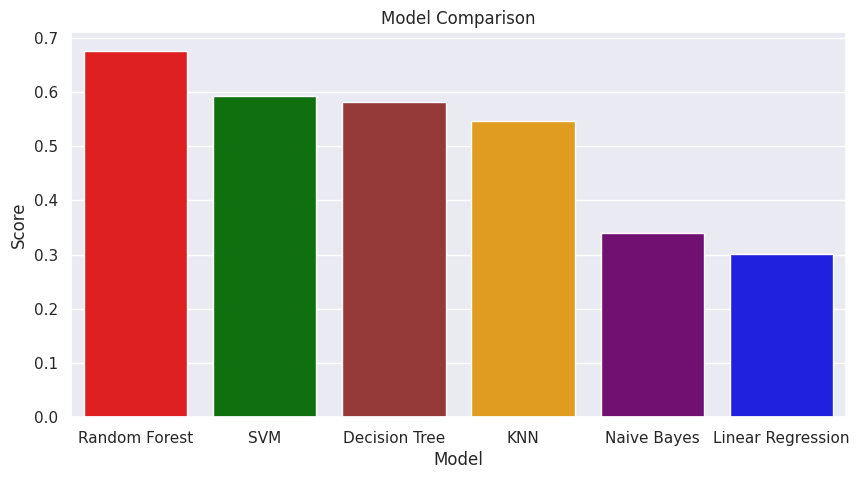

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data

# Standardize the data
scaler = StandardScaler()
scaler.fit(df.drop('quality', axis=1))
X_scaled = scaler.transform(df.drop('quality', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['quality'], test_size=0.3, random_state=101)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=101)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = lr.score(X_test, y_test)
print(f'Linear Regression Accuracy: {accuracy_lr * 100:.2f}%')

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = svm.score(X_test, y_test)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = knn.score(X_test, y_test)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = dt.score(X_test, y_test)
print(f'Decision Tree Accuracy: {accuracy_dt * 100:.2f}%')

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = nb.score(X_test, y_test)
print(f'Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%')

# Create a DataFrame to store model names, their respective scores, and colors
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_rf, accuracy_nb, accuracy_dt],
    'Color': ['blue', 'orange', 'green', 'red', 'purple', 'brown']
})

# Sort the DataFrame by score in descending order
models_sorted = models.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
print(models_sorted)

# Plotting the graph with different colors for each model
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Score', data=models_sorted, palette=models_sorted['Color'].tolist())
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()


Finally, a bar plot is created using Seaborn, where each bar represents a model, and the height of the bar represents its score.


Based on the model comparison, the Random Forest model achieved the highest score (0.684615), followed by the Decision Tree model (0.582051). The KNN model performed reasonably well with a score of 0.473846, while the SVM and Naive Bayes models had scores of 0.443077 and 0.400000, respectively. The Linear Regression model had the lowest score at 0.301529.

**In conclusion, for the given dataset and problem, the Random Forest model appears to be the most effective among the models considered. It's important to note that the choice of the best model may vary depending on the specific characteristics of the data and the goals of the analysis. It is recommended to further fine-tune the models, explore feature engineering, and consider other techniques to potentially improve overall model performance.**